# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
df_sat17 = pd.read_csv('../data/sat_2017.csv')
df_act17 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
df_sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
df_act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

**Answer:**

<span style='color:Blue'>
    
* The files read are: sat_2017.csv and act_2017.csv
* sat_2017.csv has 52 rows (include header)
* act_2017.csv has 53 rows (include header)
* Both files have the same column field of 'State'

  
</span>

_NB: For consistency and ease of read. 'sat17' shall refer to sat_2017.csv; 'act17' shall refer to act_2017.csv_

#### 4a. Does the data look complete? 

<span style='color:Red'>

*No. of issues identified in the data:*

1. act17's Composite score for State Wyoming is '20.2x'(type error). This singular value needs to be fixed/adjusted    
2. act17's Composite need to change datatype to float to faciliate computation
3. act17's 'Participation': To remove '%' otherwise, unable to proceed changing datatype
4. act17's 'Participation' need to change datatype to int64 to faciliate computation

------------------------------------------------------------------------------

5. sat17's 'Participation': To remove '%' otherwise, unable to proceed changing datatype    
6. sat17's 'Participation' need to change datatype to int64 to faciliate computation

------------------------------------------------------------------------------

7. No.of rows for both dataset do not match. 
<br />
A quick visual check indicates act17 xls has an additional row named 'National' (To be verified via python based check in later code)

_NB: 7 error items identified, these will be refer in later sections as 'item1_error' etc_    
</span>

------------------------------------------------------------------------------



#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**


------------------------------------------------------------------------------
<span style='color:Blue'>


ACT
* Composite score from 1 to 36
* Each individual subject(English, mathematics, reading, science) from 1 to 36

------------------------------------------------------------------------------
SAT

* Total score from 400–1600
* Evidence-Based Reading and Writing Section from 200–800
* Math Section from 200–800
    
------------------------------------------------------------------------------    
</span>


Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

**Answer:**

<br />
<span style='color:Blue'>

Range based data checks performed, indicated the data values are ok and fall within the range :
    
sat17's data all comply and fall within range:
* Total score: 400–1600
* Evidence-Based Reading and Writing Section: 200–800
* Math Section: 200–800
------------------------------------------------------------------------------    
act17 data all comply and fall within range:
* Composite score: 1-36
* All individual subjects(English, mathematics, reading, science): 1-36
    
</span>

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

<span style='color:Blue'>

**Fix item1_error:**
<br />act17's Composite need to change datatype to float to faciliate computation


    
</span>

In [5]:
# ACT composite is the average of 4 subjects
# We can safely use this value to replace the original '20.2x'
sum_of_4_subj = df_act17.loc[51,'English'] + df_act17.loc[51,'Math'] + df_act17.loc[51,'Reading'] + df_act17.loc[51,'Science'] 
avg_4_subj = sum_of_4_subj/4
avg_4_subj

20.15

In [6]:

# Obvious fact that rounding 20.15 gives 20.2 (almost same as 20.2x)
# Assigns newly calculated composite value. From '20.2x' to 20.15
df_act17.loc[51,'Composite'] = avg_4_subj
df_act17.loc[51,'Composite']

20.15

#### 5. What are your data types? 
Display the data types of each feature. 

In [7]:
print(df_act17.dtypes)
print(df_sat17.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  


**Answers:**<br />
<span style='color:Blue'>
Answers have already been addressed in the earlier sections    
</span>

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

<span style='color:Blue'>

**Fix item2_error:**
<br />act17's Composite need to change datatype to float to faciliate computation

------------------------------------------------------------------------------
**Remarks**<br />
Alternative method:<br />
df_act17['Composite'] = df_act17['Composite'].astype(float)    
    
</span>

In [8]:
df_act17[['Composite']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Composite  52 non-null     object
dtypes: object(1)
memory usage: 544.0+ bytes


In [9]:
df_act17['Composite'] = df_act17['Composite'].apply(pd.to_numeric)
df_act17[['Composite']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Composite  52 non-null     float64
dtypes: float64(1)
memory usage: 544.0 bytes


- Fix any individual values preventing other columns from being the appropriate type.

<span style='color:Blue'>

**Fix item3_error:**
<br />act17's 'Participation': To remove '%' otherwise, unable to proceed changing datatype

------------------------------------------------------------------------------
**Remarks:**<br />
None   
    
</span>

In [10]:
df_act17['Participation'] = df_act17.Participation.str.replace('%','')
# To confirm that '%' is removed
df_act17[['Participation']].head(2)

,Participation
0,60
1,100


<span style='color:Blue'>

**Fix item4_error:**
<br />act17's 'Participation' need to change datatype to int64 to faciliate computation

------------------------------------------------------------------------------
**Remarks:**<br />
None
    
</span>

In [11]:
print(df_act17.Participation.dtypes)
#print('\n')
print("Changing the datatype...")
#print('\n')
df_act17['Participation'] = pd.to_numeric(df_act17['Participation'])
print(df_act17.Participation.dtypes)

object
Changing the datatype...
int64


<span style='color:Blue'>

**Fix item5_error:**
<br />sat17's 'Participation': To remove '%' otherwise, unable to proceed changing datatype

------------------------------------------------------------------------------
**Remarks:**<br />
None
    
</span>

In [12]:
df_sat17[['Participation']].head(2)

,Participation
0,5%
1,38%


In [13]:
df_sat17['Participation'] = df_sat17.Participation.str.replace('%','')
# To confirm that '%' is removed
df_sat17[['Participation']].head(2)

,Participation
0,5
1,38


<span style='color:Blue'>

**Fix item6_error:**
<br />sat17's 'Participation' need to change datatype to int64 to faciliate computation

------------------------------------------------------------------------------
**Remarks:**<br />
None
    
</span>

In [14]:
df_sat17.Participation.dtypes

dtype('O')

In [15]:
df_sat17['Participation'] = pd.to_numeric(df_sat17['Participation'])
df_sat17.Participation.dtypes

dtype('int64')

- Finish your data modifications by making sure the columns are now typed appropriately.

In [16]:
df_act17.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.040385,21.508654
std,31.832518,2.332132,1.963602,2.048672,3.151113,2.002736
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.900000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.150000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,22.525000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [17]:
df_sat17.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039
std,35.276632,45.666901,84.909119,92.494812
min,2.000000,482.000000,52.000000,950.000000
25%,4.000000,533.500000,522.000000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


- Display the data types again to confirm they are correct.

In [18]:
df_act17.dtypes

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [19]:
df_sat17.dtypes

State                                 object
Participation                          int64
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [20]:
def rename_df_cols (df_for_update, prefix_to_add):
    """Updates the column names of a given dataframe"""
    for col_name in df_for_update: # 1st: Remove unwanted symbols/spaces with underscore
        if " " in col_name or "-" in col_name:
            temp_col_name = col_name.replace(" ", "_")
            temp_col_name = temp_col_name.replace("-", "_")
            df_for_update.rename(columns={col_name: temp_col_name}, inplace='True')
    # 2nd: Adds a prefixes across ALL column names(line 9)
    df_for_update.columns = [prefix_to_add + str(col) for col in df_for_update.columns]
    for col_name in df_for_update: # 3rd: Reverts column name 'state'
        if "State" in col_name:
            df_for_update.rename(columns={col_name: "State"}, inplace='True')
    df_for_update.columns = map(str.lower, df_for_update.columns) # 4th: all col_names to lower case
    return df_for_update

In [21]:
# Apply the change on df_sat17
rename_df_cols(df_sat17, 'sat17_')
# Post-change checks
df_sat17.columns.values

array(['state', 'sat17_participation',
       'sat17_evidence_based_reading_and_writing', 'sat17_math',
       'sat17_total'], dtype=object)

In [22]:
# Apply the change on df_act17
rename_df_cols(df_act17, 'act17_')
# Post-change checks
df_act17.columns.values

array(['state', 'act17_participation', 'act17_english', 'act17_math',
       'act17_reading', 'act17_science', 'act17_composite'], dtype=object)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

<html xmlns:o="urn:schemas-microsoft-com:office:office"
xmlns:x="urn:schemas-microsoft-com:office:excel"
xmlns="http://www.w3.org/TR/REC-html40">

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=ProgId content=Excel.Sheet>
<meta name=Generator content="Microsoft Excel 14">
<link rel=File-List href="d_table_files/filelist.xml">
<style id="d_table - Copy_11647_Styles">
<!--table
	{mso-displayed-decimal-separator:"\.";
	mso-displayed-thousand-separator:"\,";}
.xl1511647
	{padding-top:1px;
	padding-right:1px;
	padding-left:1px;
	mso-ignore:padding;
	color:black;
	font-size:11.0pt;
	font-weight:400;
	font-style:normal;
	text-decoration:none;
	font-family:Calibri, sans-serif;
	mso-font-charset:0;
	mso-number-format:General;
	text-align:general;
	vertical-align:bottom;
	mso-background-source:auto;
	mso-pattern:auto;
	white-space:nowrap;}
-->
</style>
<title>Project1_Data_Dictionary</title>
</head>

<body>
<!--[if !excel]>&nbsp;&nbsp;<![endif]-->
<!--The following information was generated by Microsoft Excel's Publish as Web
Page wizard.-->
<!--If the same item is republished from Excel, all information between the DIV
tags will be replaced.-->
<!----------------------------->
<!--START OF OUTPUT FROM EXCEL PUBLISH AS WEB PAGE WIZARD -->
<!----------------------------->

<div id="d_table - Copy_11647" align=center x:publishsource="Excel">

<h1 style='color:black;font-family:Calibri;font-size:14.0pt;font-weight:800;
font-style:normal'>Project1_Data_Dictionary</h1>

<table border=0 cellpadding=0 cellspacing=0 width=815 style='border-collapse:
 collapse;table-layout:fixed;width:613pt'>
 <col width=231 style='mso-width-source:userset;mso-width-alt:8075;width:174pt'>
 <col width=49 style='mso-width-source:userset;mso-width-alt:1698;width:37pt'>
 <col width=83 style='mso-width-source:userset;mso-width-alt:2909;width:63pt'>
 <col width=452 style='mso-width-source:userset;mso-width-alt:15778;width:339pt'>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 width=231 style='height:14.5pt;width:174pt'>Feature</td>
  <td class=xl1511647 width=49 style='width:37pt'>Type</td>
  <td class=xl1511647 width=83 style='width:63pt'>Dataset</td>
  <td class=xl1511647 width=452 style='width:339pt'>Description</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>State</td>
  <td class=xl1511647>object</td>
  <td class=xl1511647>act_2017.csv</td>
  <td class=xl1511647>The name of a US State</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>Participation</td>
  <td class=xl1511647>integer</td>
  <td class=xl1511647>act_2017.csv</td>
  <td class=xl1511647>Percentage of students in the state who took the ACT
  exam: range 0-100</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>English</td>
  <td class=xl1511647>float</td>
  <td class=xl1511647>act_2017.csv</td>
  <td class=xl1511647>English portion of SAT. Score: range 1-36</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>Math</td>
  <td class=xl1511647>float</td>
  <td class=xl1511647>act_2017.csv</td>
  <td class=xl1511647>Math portion of SAT. Score: range 1-36</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>Reading</td>
  <td class=xl1511647>float</td>
  <td class=xl1511647>act_2017.csv</td>
  <td class=xl1511647>Reading portion of SAT. Score: range 1-36</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>Science</td>
  <td class=xl1511647>float</td>
  <td class=xl1511647>act_2017.csv</td>
  <td class=xl1511647>Science portion of SAT. Score: range 1-36</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>Composite</td>
  <td class=xl1511647>float</td>
  <td class=xl1511647>act_2017.csv</td>
  <td class=xl1511647>The average of the four test scores. Score: range 1-36</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>State</td>
  <td class=xl1511647>object</td>
  <td class=xl1511647>sat_2017.csv</td>
  <td class=xl1511647>The name of a US State</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>Participation</td>
  <td class=xl1511647>integer</td>
  <td class=xl1511647>sat_2017.csv</td>
  <td class=xl1511647>Percentage of students in the state who took the SAT
  exam: range 0-100</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>Evidence-Based Reading
  and Writing</td>
  <td class=xl1511647>integer</td>
  <td class=xl1511647>sat_2017.csv</td>
  <td class=xl1511647>The reading and writing sections of SAT. Score: range
  200-800</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>Math</td>
  <td class=xl1511647>integer</td>
  <td class=xl1511647>sat_2017.csv</td>
  <td class=xl1511647>Math portion of SAT. Score: range 200-800</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl1511647 style='height:14.5pt'>Total</td>
  <td class=xl1511647>integer</td>
  <td class=xl1511647>sat_2017.csv</td>
  <td class=xl1511647>Total SAT scores. Score: 400–1600</td>
 </tr>
  <tr height=0 style='display:none'>
  <td width=231 style='width:174pt'></td>
  <td width=49 style='width:37pt'></td>
  <td width=83 style='width:63pt'></td>
  <td width=452 style='width:339pt'></td>
 </tr>
 
</table>

</div>


<!----------------------------->
<!--END OF OUTPUT FROM EXCEL PUBLISH AS WEB PAGE WIZARD-->
<!----------------------------->
</body>

</html>


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

<span style='color:Blue'>

**Fix item7_error:**
<br />No.of rows for both dataset do not match

------------------------------------------------------------------------------
**Remarks:**<br />
To drop act17's first row 'National'
    
</span>

In [23]:
df_act17.head(2)

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
0,National,60,20.3,20.7,21.4,21.0,21.0
1,Alabama,100,18.9,18.4,19.7,19.4,19.2


In [24]:
# Understanding both data rows's difference via python rather than visual inspection
# Converts ACT's and SAT's pandas series data('State') into lists
act17_list = df_act17['state'].tolist()
sat17_list = df_sat17['state'].tolist()

# The converted lists are then used here to obtain the difference between them
diff1 = [state1 for state1 in act17_list if state1 not in sat17_list]
diff1

['National']

In [25]:
# Use dataframe's drop function to drop entire row and use 'inplace=True' to make changes permanent
df_act17.drop(0,inplace=True)
df_act17.head(2)

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8


In [26]:
# A row is removed, best practice to reset the index
# Assigns to temp variable to prevent large output from hoarding the screen
temp = df_act17.reset_index()

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [27]:
# pd.merge(df1, df2.rename(on='id', how='left'))

df_both17 = pd.merge(df_act17, df_sat17,on='state', how='left')
df_both17.columns.values

array(['state', 'act17_participation', 'act17_english', 'act17_math',
       'act17_reading', 'act17_science', 'act17_composite',
       'sat17_participation', 'sat17_evidence_based_reading_and_writing',
       'sat17_math', 'sat17_total'], dtype=object)

In [28]:
df_both17.dtypes

state                                        object
act17_participation                           int64
act17_english                               float64
act17_math                                  float64
act17_reading                               float64
act17_science                               float64
act17_composite                             float64
sat17_participation                           int64
sat17_evidence_based_reading_and_writing      int64
sat17_math                                    int64
sat17_total                                   int64
dtype: object

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
df_both17.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
df_sat18 = pd.read_csv('../data/sat_2018.csv')
df_act18 = pd.read_csv('../data/act_2018_updated.csv')

In [31]:
# See comments in cell below
act18_list = df_act18['State'].tolist()
sat18_list = df_sat18['State'].tolist()

diff2 = [state1 for state1 in act18_list if state1 not in sat18_list]
diff2

[]

<span style='color:Red'>

**No. of issues identified in the data:**

1. sat18 have a row position issue. Need to flip rows 37 and rows 38 **
2. sat18's 'Participation': To remove '%' otherwise, unable to proceed changing datatype
3. sat18's 'Participation' need to change datatype to int64 to faciliate computation
<br />

------------------------------------------------------------------------------
_NB: <br />
**
Both sat and act 2018 data have identical values for 'State' based on python comparison<br /> 
But using a dedicated file difference software(DiffMerge), a positioning difference is spotted<br />
The rest of the data: act17/18 and sat17 shows 'Ohio at row37' and 'Oklahoma at row38'<br />
Only sat18 is having the above 2 states flipped in sequence<br />
The wrong row positioning on file sat18 at rows37 and rows38 needs to be addressed_
<br />    

_The row numbers could differ based upon checks done on different platforms(DiffMerge vs python etc)_    

</span>

<span style='color:Blue'>

**Fix item1_error:**
<br />sat18 have a row position issue. Need to flip rows 37 and rows 38(35 and 36 as in python)

------------------------------------------------------------------------------
**Remarks:**<br />
None
    
</span>

In [32]:
# Pre-change checks
df_act18.loc[[35,36]]

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
35,Ohio,100,20.3,19.3,20.3,20.8,20.4
36,Oklahoma,100,19.3,18.4,18.8,20.1,19.4


In [33]:
# Pre-change checks
df_sat18.loc[[35,36]]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
35,Oklahoma,8%,541,521,1062
36,Ohio,18%,552,547,1099


In [34]:
# Create temporary backups
df_backup35 = df_sat18.loc[35]
df_backup36 = df_sat18.loc[36]
# Re-assign variables to the approriate rows
df_sat18.loc[35] = df_backup36
df_sat18.loc[36] = df_backup35
# Post-change checks
df_sat18.loc[[35,36]]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
35,Ohio,18%,552,547,1099
36,Oklahoma,8%,541,521,1062


<span style='color:Blue'>

**Fix item2_error:**
<br />sat18's 'Participation': To remove '%' otherwise, unable to proceed changing datatype

------------------------------------------------------------------------------
**Remarks:**<br />
None
    
</span>

In [35]:
# Pre-change checks
df_sat18[['Participation']].head(2)

,Participation
0,6%
1,43%


In [36]:
df_sat18['Participation'] = df_sat18.Participation.str.replace('%','')
# To confirm that '%' is removed
df_sat18[['Participation']].head(2)

,Participation
0,6
1,43


<span style='color:Blue'>

**Fix item3_error:**
<br />sat18's 'Participation' need to change datatype to int64 to faciliate computation

------------------------------------------------------------------------------
**Remarks:**<br />
None
    
</span>

In [37]:
# Pre-change checks
df_sat18.Participation.dtypes

dtype('O')

In [38]:
df_sat18['Participation'] = df_sat18['Participation'].astype(int)
# Post-change checks
df_sat18.Participation.dtypes

dtype('int32')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

<span style='color:Blue'>

**The approach:**
<br />
1. Rename both 2018 files in a similar fashion as before for 2017 files
2. Combine both 2018 files as 'df_both18'
3. Combine df_both17 and df_both18 as 'final'
4. Export final to excel as 'final.csv'
    
</span>

<span style='color:Blue'>
Step1. Rename both 2018 files in a similar fashion as before for 2017 files  
</span>

In [39]:
# Pre-change checks
print(df_act18.columns.values)
print(df_sat18.columns.values)

['State' 'Percentage of Students Tested' 'Average Composite Score'
 'Average English Score' 'Average Math Score' 'Average Reading Score'
 'Average Science Score']
['State' 'Participation' 'Evidence-Based Reading and Writing' 'Math'
 'Total']


In [40]:
# Apply the change on df_act18
rename_df_cols(df_act18, 'act18_')
# Post-change checks
df_act18.columns.values

array(['state', 'act18_percentage_of_students_tested',
       'act18_average_composite_score', 'act18_average_english_score',
       'act18_average_math_score', 'act18_average_reading_score',
       'act18_average_science_score'], dtype=object)

In [41]:
# Apply the change on df_sat18
rename_df_cols(df_sat18, 'sat18_')
# Post-change checks
df_sat18.columns.values

array(['state', 'sat18_participation',
       'sat18_evidence_based_reading_and_writing', 'sat18_math',
       'sat18_total'], dtype=object)

<span style='color:Blue'>
Step 2. Combine both 2018 files as 'df_both18'
</span>

In [42]:
# Apply the change
df_both18 = pd.merge(df_act18, df_sat18,on='state', how='left')
# Post-change checks
df_both18.head(2)

,state,act18_percentage_of_students_tested,act18_average_composite_score,act18_average_english_score,act18_average_math_score,act18_average_reading_score,act18_average_science_score,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total
0,Alabama,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
1,Alaska,33,20.8,19.8,20.6,21.6,20.7,43,562,544,1106


<span style='color:Blue'>
Step 3. Combine df_both17 and df_both18 as 'final.csv'
</span>

In [43]:
# Apply the change
final = pd.merge(df_both17, df_both18,on='state', how='left')
# Post-change checks
final.head(2)

,state,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite,sat17_participation,sat17_evidence_based_reading_and_writing,sat17_math,...,act18_percentage_of_students_tested,act18_average_composite_score,act18_average_english_score,act18_average_math_score,act18_average_reading_score,act18_average_science_score,sat18_participation,sat18_evidence_based_reading_and_writing,sat18_math,sat18_total
0,Alabama,100,18.9,18.4,19.7,19.4,19.2,5,593,572,...,100,19.1,18.9,18.3,19.6,19.0,6,595,571,1166
1,Alaska,65,18.7,19.8,20.4,19.9,19.8,38,547,533,...,33,20.8,19.8,20.6,21.6,20.7,43,562,544,1106


<span style='color:Blue'>
Step 4. Export final to excel as 'final.csv'
</span>

In [44]:
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [45]:
# Transpose is one of dataframe's function.
# The output of dataframe.describe() is a dataframe
# We just take the output from function describe and we add '.transpose()'

(df_act17.describe()).transpose()

,count,mean,std,min,25%,50%,75%,max
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.041176,3.182463,2.3,19.90,21.3,22.75,24.9
act17_composite,51.0,21.518627,2.021360,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

<span style='color:Blue'>
The above formula is for population rather than sample. Denominator is n and NOT 'n-1'
</span>

In [46]:
import statistics
from math import sqrt

def p_stdev(input_list):
    """Returns the population standard deviation value based on an input list"""
    avg1 = statistics.mean(input_list) # Gets mean as 'avg1'
    numerator_items = [(numb1-avg1)**2 for numb1 in input_list] # Computes each item at the numerator
    sum_numerator_item = sum(numerator_items ) # Sums all items at numerator
    n = len(input_list) # Calculates population size, this becomes denominator
    temp_st_dev = sqrt(sum_numerator_item/n) # St_dev is square-root of variance
    return temp_st_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [47]:
# I randomnly selects the act17 dataset for this question as an input and caculations

# Approach: step1:Creates 2 required lists; step2: Runs the 2 list and the function inside a list comprehension

# Gets all the names of each columns and converts them into a single list
key_col_names = df_act17.columns.values.tolist()
# 'State' is an object. Remove it from standard deviation caculation
key_col_names.remove('state')
# Gets all the values/scores of each columns and converts them into a single list
value_col_names = [df_act17[n].tolist() for n in df_act17.columns.values if n != 'state']

# Runs the 'column-names' against respective values/scores, applying the customsied function 'p_stdev' at each iteration
stdev_act_subjects = {key_col_names[i]: p_stdev(value_col_names[i]) for i in range(len(key_col_names))}
stdev_act_subjects

{'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363363,
 'act17_math': 1.9624620273436784,
 'act17_reading': 2.0469029314842646,
 'act17_science': 3.151107895464408,
 'act17_composite': 2.001444595548517}

In [48]:
df_act17.describe()

,act17_participation,act17_english,act17_math,act17_reading,act17_science,act17_composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.518627
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.021360
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [49]:
# Random picked the standard devaition caculation(using numpy) for act17 English and Math
# These values are used for comparison against generic pandas's output and my function's output
eng_sd = np.std((df_act17.values[:,2]))
print(eng_sd)

math_sd = np.std((df_act17.values[:,3]))
print(math_sd)

2.3304876369363363
1.9624620273436781


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answers:**<br />

<span style='color:Blue'>

Do your manually calculated standard deviations match up with the output from pandas describe?<br />
No

What about numpy's std method?    
Yes 
    
Pandas use sample based standard deviations and obtained a slightly higher value<br />
(smaller denominator results in overall larger output value)<br />    
My manual standard deviations functions produce outputs that are the same as numpy's.<br />
which means numpy apply population based standard deviations caculations

</span>

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest **participation rates** for the:
    - 2017 SAT? <br /><span style='color:Blue'> Ans: Highest: Connecticut,Delaware,District of Columbia,Michigan; 
    <br />Lowest: Iowa,Mississippi,North Dakota </span> 
    - 2018 SAT? <br /><span style='color:Blue'> Ans: Highest: Colorado,Connecticut,Delaware,Idaho,Michigan;  Lowest: North Dakota </span>
    - 2017 ACT? 
    <br /><span style='color:Blue'> 
        Ans: Highest: Alabama,	Arkansas,	Colorado,	Kentucky,	Louisiana,	Minnesota,	Mississippi,	Missouri,	Montana,	Nevada,	North Carolina,	Oklahoma,	South Carolina,	Tennessee,	Utah,	Wisconsin,	Wyoming <br />
    Lowest: Maine</span>
    
    - 2018 ACT? <br /><span style='color:Blue'> 
    Ans: Highest: Alabama,	Arkansas,	Kentucky,	Louisiana,	Mississippi,	Missouri,	Montana,	Nebraska,	Nevada,	North Carolina,	Ohio,	Oklahoma,	South Carolina,	Tennessee,	Utah,	Wisconsin,	Wyoming; 
    <br />Lowest: Maine </span>
- Which states have the highest and lowest **mean total/composite scores** for the:
    - 2017 SAT? <br /><span style='color:Blue'> Ans: Highest: Minnesota; Lowest: District of Columbia </span>
    - 2018 SAT? <br /><span style='color:Blue'> Ans: Highest: Minnesota; Lowest: District of Columbia </span>
    - 2017 ACT? <br /><span style='color:Blue'> Ans: Highest: New Hampshire; Lowest: Nevada </span>
    - 2018 ACT? <br /><span style='color:Blue'> Ans: Highest: Connecticut; Lowest: Nevada </span>


- Do any states with 100% participation on a given test have a rate change year-to-year?<br />
 
    Ans:<br /> 
<span style='color:Blue'>
 Colorado and Minnesota had 100% ACT participation for 2017, both did not manage mantain 100% for 2018
<br /> District of Columbia had 100% SAT participation for 2017, it did not manage mantain 100% for 2018
</span>   
<br />


<span style='color:Red'>
NB:Clarifications for this question from sg-dsi-14 tutors:
"if there are states with 100% participation in 2017.. you want to identify those that did not maintain 100% participation in 2018"
</span>


<br />



- Do any states show have >50% participation on *both* tests either year?<br />

<span style='color:Blue'> 
 Ans:<br /> 
States with >50% participation on both tests for year 2017: Florida, Georgia, Hawaii<br />
States with >50% participation on both tests for year 2018: Florida, Georgia, Hawaii,North Carolina, South Carolina<br />
<br />
_Also see code below_
</span>

In [50]:
sat17_part = df_sat17[df_sat17['sat17_participation']>50].state.tolist() #1
sat18_part = df_sat18[df_sat18['sat18_participation']>50].state.tolist() #2

act17_part = df_act17[df_act17['act17_participation']>50].state.tolist() #3
act18_part = df_act18[df_act18['act18_percentage_of_students_tested']>50].state.tolist()#4

# Compare #1 and #3, (sat17 and act17)

both_sat17_and_act17_more_50 = [state1 for state1 in sat17_part if state1 in act17_part]
both_sat17_and_act17_more_50_qty = len(both_sat17_and_act17_more_50)

# Compare #2 and #4, (sat18 and act18)

both_sat18_and_act18_more_50 = [state1 for state1 in sat18_part if state1 in act18_part]
both_sat18_and_act18_more_50_qty = len(both_sat18_and_act18_more_50)

# States with >50% participation on both tests for year 2017
print(both_sat17_and_act17_more_50_qty)
print(both_sat17_and_act17_more_50)
# States with >50% participation on both tests for year 2018
print(both_sat18_and_act18_more_50_qty)
print(both_sat18_and_act18_more_50)

3
['Florida', 'Georgia', 'Hawaii']
5
['Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina']



Based on what you've just observed, have you identified any states that you're especially interested in?<br /> **Make a note of these and state *why* you think they're interesting**.<br />

<span style='color:Blue'> Ans: 
**This section is answered under 'Outside Research'**
</span><br />


**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

**A description of the optional settings for the sns heatmap code:**<br />

<span style='color:Blue'>

* Annot:Annotate on/off for correlation coefficent on the heatmap
* fmt refers to decimal places
* limits of the colormap: vmin,vmax,center
 (base on the values, the '0' might not be always in the center)
* linewidths: Adding a thin white line separator between the cells(easier viewing)
* Adjusting personal preference for heatmap via cmap= 'coolwarm'
* Heatmap was too small, adjusted it using 'figsize=(20,15)'
* Use the option 'mask' to view heatmap as 'rectangle-half'. Reason:To omit repeated values and avoid chart overclutter
</span>

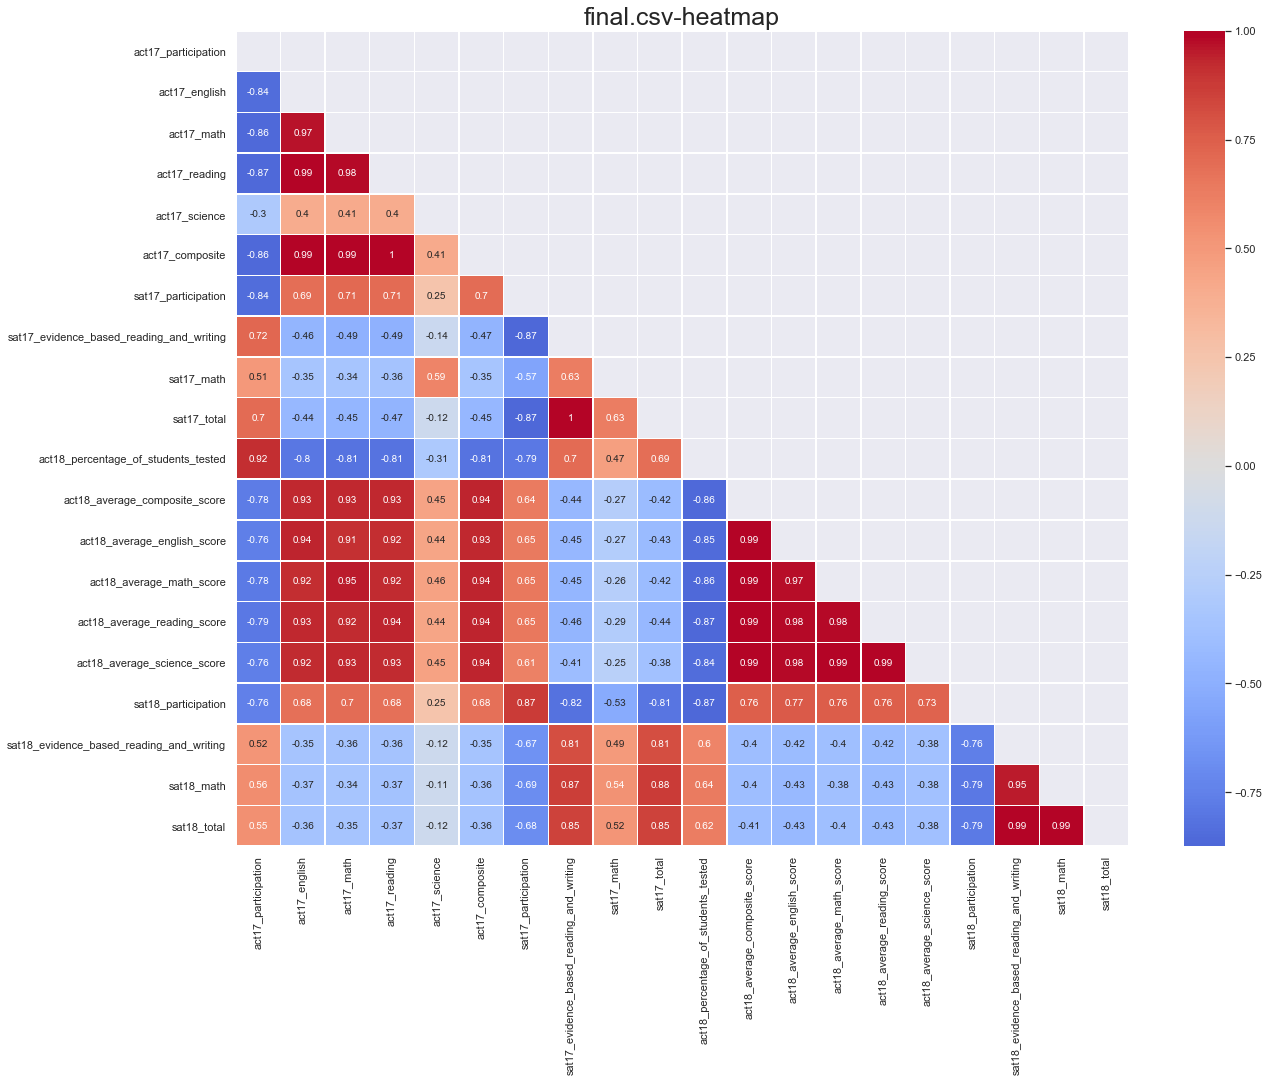

In [51]:
matrix = np.triu(final.corr()) 
plt.figure(figsize=(20,15))
plt.title('final.csv-heatmap', fontsize=25)
sns.heatmap(final.corr(), annot=True, fmt='.2g',center= 0,linewidths=.5,cmap= 'coolwarm',mask=matrix)

**Comments and understanding on the above heatmap**<br />

<span style='color:Blue'>

* The correlation coefficient has a value ranging from -1 to 1
* Example of positive correlation:<br />
sat18_math has a correlation coefficient of 0.99 to sat18_total, which means those who score well in sat math is also very likely to have a high sat total score. Vice-versa
    
* Example of negative correlation:<br />
act17_participation has a correlation coefficient of -0.86 to act17_composite, which means when the act participation is low in the state, the act composite score tends to be low as well. Vice-versa

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

** Not Used **
def subplot_histograms1(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

In [52]:
def subplot_histograms(df, list_of_columns, list_of_titles):
    """Creates 2 subplots. Each subplot has 2 histograms side by side"""
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4)) # Histogram layout and size is fixed
    count = 1
    for col_val in range(len(list_of_columns)):
        if col_val == 2:
            break
        # first loop, list args: list_of_columns[0] and list_of_columns[1]
        # 2nd loop, list args: list_of_columns[2] and list_of_columns[3]
        # 3rd loop, col_val = 2 and breaks
        axes[col_val].hist([df[list_of_columns[col_val + col_val]], df[list_of_columns[col_val + count]]],label=['2017','2018'])
        axes[col_val].legend(loc='upper right') # fixed
        axes[col_val].set_ylabel('Frequency') # fixed
        axes[col_val].set_title(list_of_titles[col_val])# expects a list with 2 items
        plt.tight_layout()
        count += 1

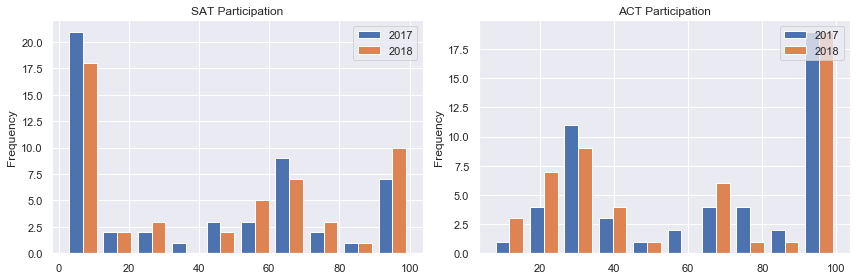

In [53]:
# Participation rates for SAT & ACT

list_part = ['sat17_participation','sat18_participation','act17_participation','act18_percentage_of_students_tested']
list_part_title = ['SAT Participation','ACT Participation']

subplot_histograms(final, list_part, list_part_title)

**Histogram Analysis(Participation rates for SAT & ACT)**

SAT has a right-skewed<br />
ACT has a left-skewed<br />
ACT has appears to a higher participation rate compared to SAT

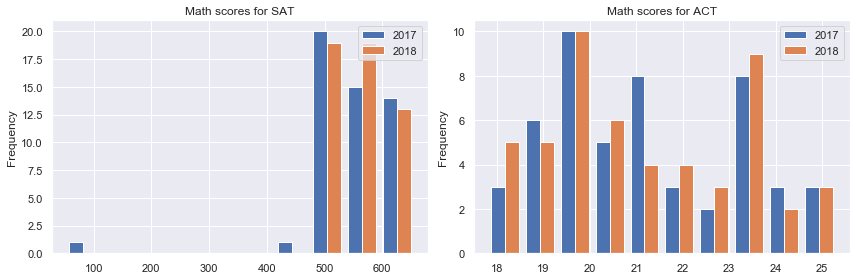

In [54]:
# Math scores for SAT & ACT

list_math = ['sat17_math','sat18_math','act17_math','act18_average_math_score']
list_math_title = ['Math scores for SAT','Math scores for ACT']

subplot_histograms(final, list_math, list_math_title)

**Histogram Analysis(Math scores for SAT & ACT)**

SAT has a left-skewed. Most States have higher SAT math score range(500 to 600)<br />
While ACT has similarities to a bimodal distribution(2 high frequency scores: 19.5 and 23.5)

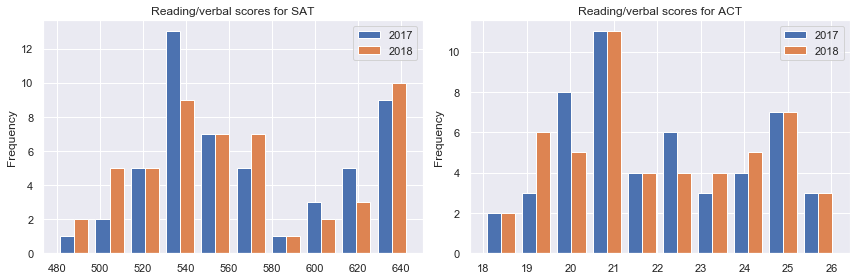

In [55]:
# Reading/verbal scores for SAT & ACT

list_read = ['sat17_evidence_based_reading_and_writing','sat18_evidence_based_reading_and_writing','act17_reading','act18_average_reading_score']
list_read_title = ['Reading/verbal scores for SAT','Reading/verbal scores for ACT']

subplot_histograms(final, list_read, list_read_title)

**Histogram Analysis(Reading/verbal scores for SAT & ACT)**

SAT has similarities to a bimodal distribution(2 high frequency scores: 540 and 640)<br />
High frequency of ACT Reading/verbal scores at around 21.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


**SAT vs. ACT math scores for 2017**

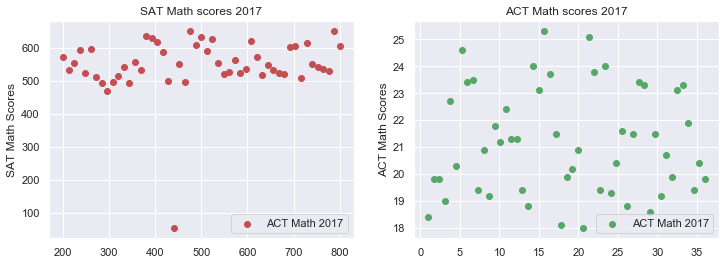

In [56]:
sat_math_range = np.linspace(200,800,51)
act_math_range = np.linspace(1,36,51)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

axes[0].scatter(sat_math_range,df_sat17['sat17_math'], color='r', label='ACT Math 2017')
axes[0].legend(loc='lower right') # fixed
axes[0].set_ylabel('SAT Math Scores') # fixed
axes[0].set_title('SAT Math scores 2017')

axes[1].scatter(act_math_range, df_act17['act17_math'], color='g', label='ACT Math 2017')
axes[1].legend(loc='lower right') # fixed
axes[1].set_ylabel('ACT Math Scores') # fixed
axes[1].set_title('ACT Math scores 2017')
plt.show()

**Scatterplot analysis(SAT vs. ACT math scores for 2017) - See above**

SAT 2017 Math score have an average score of around 500 to 600 based on a range of 200 to 800
with an outlier at score 52

ACT 2017 Math score has a slight visible cluster around the score of 19 to 22

**SAT vs. ACT verbal/reading scores for 2017**

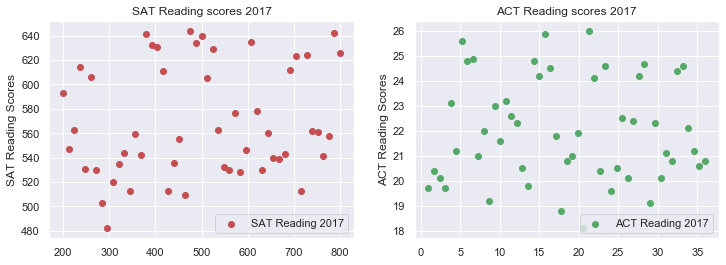

In [57]:
sat_math_range = np.linspace(200,800,51)
act_math_range = np.linspace(1,36,51)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

axes[0].scatter(sat_math_range,df_sat17['sat17_evidence_based_reading_and_writing'], color='r', label='SAT Reading 2017')
axes[0].legend(loc='lower right') # fixed
axes[0].set_ylabel('SAT Reading Scores') # fixed
axes[0].set_title('SAT Reading scores 2017')
axes[1].scatter(act_math_range, df_act17['act17_reading'], color='g', label='ACT Reading 2017')
axes[1].legend(loc='lower right') # fixed
axes[1].set_ylabel('ACT Reading Scores') # fixed
axes[1].set_title('ACT Reading scores 2017')
plt.show()

**Scatterplot analysis(SAT vs. ACT verbal/reading scores for 2017) - See above**

SAT 2017 Reading score has a slight visible cluster around the 540 scoreline

ACT 2017 Reading score has a vast dispersion of scores but there is a slight visible cluster around the scoreline of 20 to 23

**SAT vs. ACT total/composite scores for 2017**

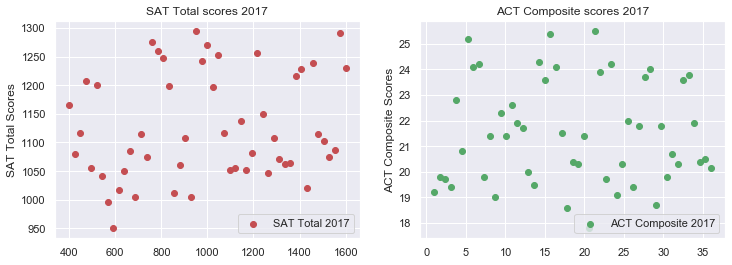

In [58]:
sat_score_range = np.linspace(400,1600,51)
act_score_range = np.linspace(1,36,51)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

axes[0].scatter(sat_score_range,df_sat17['sat17_total'], color='r', label='SAT Total 2017')
axes[0].legend(loc='lower right') # fixed
axes[0].set_ylabel('SAT Total Scores') # fixed
axes[0].set_title('SAT Total scores 2017')

axes[1].scatter(act_score_range, df_act17['act17_composite'], color='g', label='ACT Composite 2017')
axes[1].legend(loc='lower right') # fixed
axes[1].set_ylabel('ACT Composite Scores') # fixed
axes[1].set_title('ACT Composite scores 2017')
plt.show()

**Scatterplot analysis(SAT vs. ACT verbal/reading scores for 2017) - See above**

SAT 2017 total score has a slight visible cluster around 1050 to 1100

ACT 2017 total score has a slight visible cluster around 19 to 22

**Total scores for SAT 2017 vs. 2018**

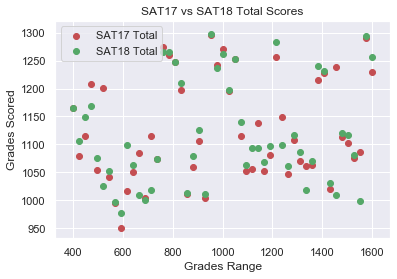

In [59]:
sat_score_range = np.linspace(400,1600,51)

plt.scatter(sat_score_range, df_sat17['sat17_total'], color='r', label='SAT17 Total')
plt.scatter(sat_score_range, df_sat18['sat18_total'], color='g', label='SAT18 Total')
plt.rcParams["figure.figsize"] = [8,6]
plt.title('SAT17 vs SAT18 Total Scores')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
plt.legend()
plt.show()

**Scatterplot analysis (Total scores for SAT 2017 vs. 2018) See above**

There is pros and cons putting both scatterplots together(a matter of choice and how to present the data).
If both data sets have a distinct pattern difference, will would be visibly very easy to tell the differences

In this case, we can also use '#' to activate/de-activate the code , so as to view/analyse it as an individual scatterplot
Overall, Both SAT 2017 and 2018 total score has a modest visible cluster around 1050 to 1100

**Composite scores for ACT 2017 vs. 2018**

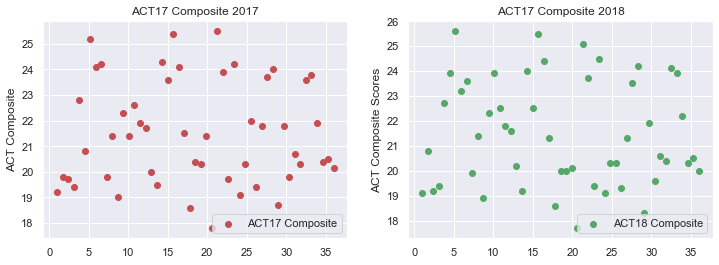

In [60]:
act_score_range = np.linspace(1,36,51)

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

axes[0].scatter(act_score_range,df_act17['act17_composite'], color='r', label='ACT17 Composite')
axes[0].legend(loc='lower right') # fixed
axes[0].set_ylabel('ACT Composite') # fixed
axes[0].set_title('ACT17 Composite 2017')

axes[1].scatter(act_score_range, df_act18['act18_average_composite_score'], color='g', label='ACT18 Composite')
axes[1].legend(loc='lower right') # fixed
axes[1].set_ylabel('ACT Composite Scores') # fixed
axes[1].set_title('ACT17 Composite 2018')
plt.show()

**Scatterplot analysis for Total scores for ACT 2017 vs. 2018**

Both datasets have a rather wide dispersion of data points
and a mildly visible cluster around 19 to 22

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

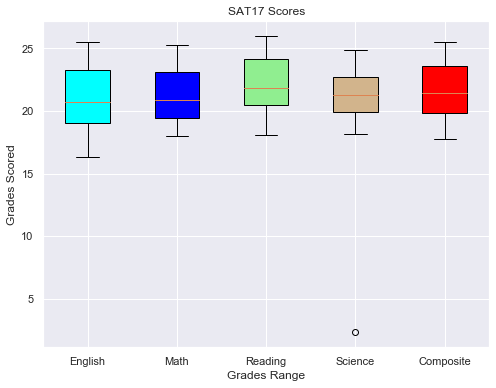

In [61]:
box_plot_data = [
df_act17['act17_english'], 
df_act17['act17_math'] , 
df_act17['act17_reading'], 
df_act17['act17_science'],
df_act17['act17_composite']
]

box = plt.boxplot(box_plot_data,patch_artist=True,labels=['English','Math','Reading','Science', 'Composite'])
plt.rcParams["figure.figsize"] = [12,6]
plt.title('SAT17 Scores')
plt.xlabel('Grades Range')
plt.ylabel('Grades Scored')
#plt.legend()
colors = ['cyan', 'blue', 'lightgreen', 'tan', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

**Boxplot analysis (Total scores for ACT 2017 vs. 2018)**

Interesting observation:<br />
ACT17 Science's interquantiles of 25,median and 75% are at 19.9,21.3,22.75 respectively.<br />
The range of values are packed quite close and has a 'shorter body' as compared to the rest.<br />
ACT17 Science score has an outlier at 2.3

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

**Not exploring this**

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

**A geological description of 2017 ACT test in America:**<br />

<span style='color:Blue'>

* Using Tableau to provide a visual representation of the 2017 ACT test in 48 States<br />
(Alaska and Hawaii was left out so that the map can stay focus on the most of the US states)<br />
* The field 'participation' was been expressed in Tableau in the form of colors (also see legend at the bottom-left)<br />
With dark-green showing the highest participation and dark-red showing lowest(Maine etc)<br />
The use of colors for 'participation' was also in consideration of not over cluttering the map with too much information
* Lastly, alongside the State names, are the corresponging ACT composite scores
    
</span>

![title](../misc/2017_act.png)

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns.<br /> 
We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.<br />

While we will continue to build our analytic tools, we know that measures of *central tendency*, <br />*spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

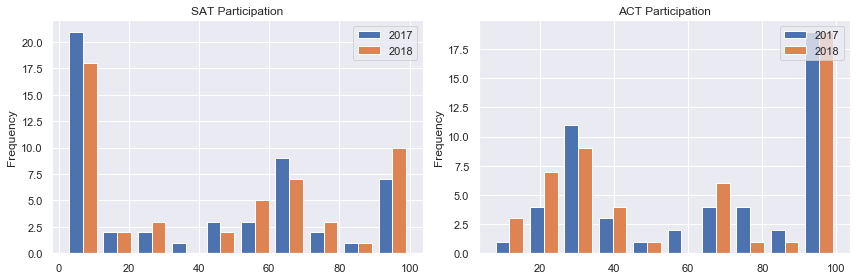

In [62]:
# Explaining left-skewed/right-skewed distribution
# Participation rates for SAT & ACT

list_part = ['sat17_participation','sat18_participation','act17_participation','act18_percentage_of_students_tested']
list_part_title = ['SAT Participation','ACT Participation']

subplot_histograms(final, list_part, list_part_title)

SAT participation has a right-skewed<br />
ACT participation has a left-skewed<br />
_Please note that choosing 2017 or 2018 dataset would not make a difference in explaining distribution skewness here_

In [63]:
# SAT participation has a right-skewed, if true: then the mean is greater than median
# Results: SAT participation mean is greater than median

df_sat17['sat17_participation'].mean() > df_sat17['sat17_participation'].median()

True

In [64]:
# ACT participation has a left-skewed, if true: then the mean is less than median
# Results: ACT participation mean is less than median

df_act17['act17_participation'].mean() < df_act17['act17_participation'].median()

True

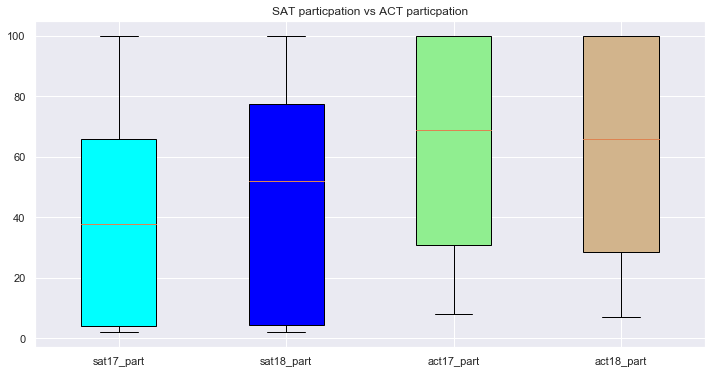

In [65]:
# Looking at spread(IQR), median in distributions

box_plot_data = [
df_sat17['sat17_participation'], 
df_sat18['sat18_participation'] , 
df_act17['act17_participation'], 
df_act18['act18_percentage_of_students_tested'],
]

box = plt.boxplot(box_plot_data,patch_artist=True,labels=['sat17_part','sat18_part','act17_part','act18_part'])
plt.rcParams["figure.figsize"] = [12,6]
plt.title('SAT particpation vs ACT particpation')
colors = ['cyan', 'blue', 'lightgreen', 'tan', 'red']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()

<span style='color:Blue'>
    
**ACT test is more popluar(2017 to 2018)**
1. ACT IQR in 25%,75%, median values are all greater than SAT's (both 2017 and 2018)
2. boxplot has 'body' and/or 'tail(line)'<br />
sat's participation on the high side is represented by tails (fewer counts)<br />
whereas act's participation on the high side is represented by body (more counts)<br />
(both 2017 and 2018)    
<br />    
  
</span>


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

<span style='color:Blue'>
    
The act17 math distribution:
- is slightly right-skewed.(see histogram below)
- Even as the mean, median and mode are relatively close, this does not look like a normal distribution
<br />    
  
</span>

In [66]:
act17_math_mode = df_act17['act17_math'].mode().values[0]
act17_math_median = df_act17['act17_math'].median()
act17_math_mean = df_act17['act17_math'].mean()
# Printing the central tendencies: mean , median and mode:
print('The act17 math mean is: ' + str(act17_math_mean))
print('The act17 math median is: ' + str(act17_math_median))
print('The act17 math mode is: ' + str(act17_math_mode))

The act17 math mean is: 21.182352941176468
The act17 math median is: 20.9
The act17 math mode is: 19.4


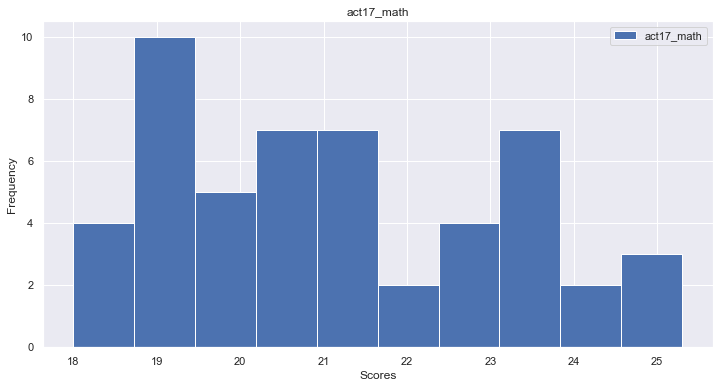

<Figure size 576x432 with 0 Axes>

In [67]:
plt.hist([df_act17['act17_math']],label=['act17_math'])
plt.rcParams["figure.figsize"] = [8,6]
plt.title('act17_math')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.legend()
plt.show()
plt.tight_layout()

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

<span style='color:Blue'>
    
The act17 reading distribution:
- is slightly right-skewed.(see histogram below)
- some resemblance to normal distribution as the mean, median and mode are relatively close(see code below)
<br />    

The act17 participation rate distribution:
- is left-skewed.(see histogram below)
- The mean, median and mode spread far apart(see code below)

</span>

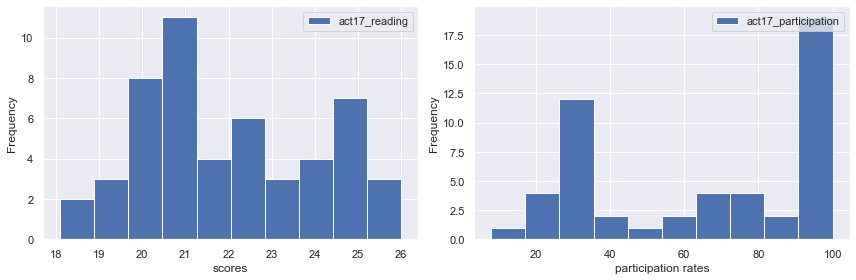

In [68]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
axes[0].hist([df_act17['act17_reading']],label=['act17_reading'])
axes[0].legend(loc='upper right')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('scores')
axes[1].hist([df_act17['act17_participation']],label=['act17_participation'])
axes[1].legend(loc='upper right')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('participation rates')
plt.tight_layout()

In [69]:
act17_reading_mode = df_act17['act17_reading'].mode().values[0]
act17_reading_median = df_act17['act17_reading'].median()
act17_reading_mean = df_act17['act17_reading'].mean()
# Printing the central tendencies: mean , median and mode:
print('The act17 reading mean is: ' + str(act17_reading_mean))
print('The act17 reading median is: ' + str(act17_reading_median))
print('The act17 reading mode is: ' + str(act17_reading_mode))

The act17 reading mean is: 22.013725490196077
The act17 reading median is: 21.8
The act17 reading mode is: 20.1


In [70]:
act17_participation_mode = df_act17['act17_participation'].mode().values[0]
act17_participation_median = df_act17['act17_participation'].median()
act17_participation_mean = df_act17['act17_participation'].mean()
# Printing the central tendencies: mean , median and mode:
print('The act17 participation mean is: ' + str(act17_participation_mean))
print('The act17 participation median is: ' + str(act17_participation_median))
print('The act17 participation mode is: ' + str(act17_participation_mode))

The act17 participation mean is: 65.25490196078431
The act17 participation median is: 69.0
The act17 participation mode is: 100


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...<br />
consider the actually populations these data describe in answering this question)*

**Answers:**<br />

<span style='color:Blue'>

This is explained in later part. See 'Conclusion and recommendations'<br />


</span>

##### Is it appropriate to compare *these* specific SAT and ACT math scores <br />
- Can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

**Answers:**<br />

<span style='color:Blue'>

1. For a start, the test score ranges are different:
    - sat math score range is 200 to 800
    - act math score range is 1 to 36<br />
As such, the scores would not be directly compared
2. Possible ways to compare sat and act math scores:
    - By calculating the percentage of the score<br />
(ACT percentage scores could lose granularity due the smaller score range and this method is not official)
    - Use act/sat conversion tables from official website:
    
https://www.act.org/content/dam/act/unsecured/documents/ACT-SAT-Concordance-Tables.pdf


</span>

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 


<span style='color:Green'>

Not exploring this for now.<br />


</span>

## Outside Research

<span style='color:Blue'>

**The other way of looking at the data:**
<br />
1. Originally, data were 'merged horizonatlly' due to act and sat having different column names
2. Merging the datasets in a top-down(vertical) manner could offer for more data insights but in the expense of dropping some columns
3. If you look at it, most of the data analysis here mainly focuses on: state, participation and score(total/composite)
(Maybe not alot into individual subjects)
4. Therefore , merging data in top-down(vertical) manner has many merits
5. To merged the data in a top-down manner and using it for the last part of analysis 
(Looking at the 3 interesting states)
6. Lastly, this has more data and they can be sorted by the test_type(ACT/SAT) and year
</span>



<html xmlns:o="urn:schemas-microsoft-com:office:office"
xmlns:x="urn:schemas-microsoft-com:office:excel"
xmlns="http://www.w3.org/TR/REC-html40">

<head>
<meta http-equiv=Content-Type content="text/html; charset=windows-1252">
<meta name=ProgId content=Excel.Sheet>
<meta name=Generator content="Microsoft Excel 14">
<link rel=File-List href="Fin1l1-DS_files/filelist.xml">
<style id="friends at GA_3803_Styles">
<!--table
	{mso-displayed-decimal-separator:"\.";
	mso-displayed-thousand-separator:"\,";}
.xl153803
	{padding-top:1px;
	padding-right:1px;
	padding-left:1px;
	mso-ignore:padding;
	color:black;
	font-size:11.0pt;
	font-weight:400;
	font-style:normal;
	text-decoration:none;
	font-family:Calibri, sans-serif;
	mso-font-charset:0;
	mso-number-format:General;
	text-align:general;
	vertical-align:bottom;
	mso-background-source:auto;
	mso-pattern:auto;
	white-space:nowrap;}
.xl633803
	{padding-top:1px;
	padding-right:1px;
	padding-left:1px;
	mso-ignore:padding;
	color:black;
	font-size:11.0pt;
	font-weight:700;
	font-style:normal;
	text-decoration:none;
	font-family:Calibri, sans-serif;
	mso-font-charset:0;
	mso-number-format:General;
	text-align:center;
	vertical-align:bottom;
	border:.5pt solid windowtext;
	background:#D9D9D9;
	mso-pattern:black none;
	white-space:nowrap;}
.xl643803
	{padding-top:1px;
	padding-right:1px;
	padding-left:1px;
	mso-ignore:padding;
	color:black;
	font-size:11.0pt;
	font-weight:400;
	font-style:normal;
	text-decoration:none;
	font-family:Calibri, sans-serif;
	mso-font-charset:0;
	mso-number-format:General;
	text-align:general;
	vertical-align:bottom;
	border:.5pt solid windowtext;
	mso-background-source:auto;
	mso-pattern:auto;
	white-space:nowrap;}
.xl653803
	{padding-top:1px;
	padding-right:1px;
	padding-left:1px;
	mso-ignore:padding;
	color:black;
	font-size:11.0pt;
	font-weight:400;
	font-style:normal;
	text-decoration:none;
	font-family:Calibri, sans-serif;
	mso-font-charset:0;
	mso-number-format:General;
	text-align:general;
	vertical-align:bottom;
	border:.5pt solid windowtext;
	mso-background-source:auto;
	mso-pattern:auto;
	white-space:normal;}
-->
</style>
<title>Final1 - data Dictionary</title>
</head>

<body>
<!--[if !excel]>&nbsp;&nbsp;<![endif]-->
<!--The following information was generated by Microsoft Excel's Publish as Web
Page wizard.-->
<!--If the same item is republished from Excel, all information between the DIV
tags will be replaced.-->
<!----------------------------->
<!--START OF OUTPUT FROM EXCEL PUBLISH AS WEB PAGE WIZARD -->
<!----------------------------->

<div id="friends at GA_3803" align=center x:publishsource="Excel">

<h1 style='color:black;font-family:Calibri;font-size:14.0pt;font-weight:800;
font-style:normal'>Final1 - data Dictionary</h1>

<table border=0 cellpadding=0 cellspacing=0 width=480 style='border-collapse:
 collapse;table-layout:fixed;width:361pt'>
 <col width=83 style='mso-width-source:userset;mso-width-alt:2909;width:63pt'>
 <col width=64 style='width:48pt'>
 <col width=333 style='mso-width-source:userset;mso-width-alt:11636;width:250pt'>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl633803 width=83 style='height:14.5pt;width:63pt'>state</td>
  <td class=xl633803 width=64 style='border-left:none;width:48pt'>object</td>
  <td class=xl633803 width=333 style='border-left:none;width:250pt'>state</td>
 </tr>
 <tr height=58 style='height:43.5pt'>
  <td height=58 class=xl643803 style='height:43.5pt;border-top:none'>math</td>
  <td class=xl643803 style='border-top:none;border-left:none'>float</td>
  <td class=xl653803 width=333 style='border-top:none;border-left:none;
  width:250pt'>Math portion of test<br>
    For ACT, score: 1-36 <br>
    For SAT, score: 400–1600</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl643803 style='height:14.5pt;border-top:none'>participation</td>
  <td class=xl643803 style='border-top:none;border-left:none'>float</td>
  <td class=xl643803 style='border-top:none;border-left:none'>Participation
  level in the test in precentages</td>
 </tr>
 <tr height=39 style='height:29.0pt'>
  <td height=39 class=xl643803 style='height:29.0pt;border-top:none'>test_score</td>
  <td class=xl643803 style='border-top:none;border-left:none'>float</td>
  <td class=xl653803 width=333 style='border-top:none;border-left:none;
  width:250pt'>For ACT, it refers to composite. Score: 1-36; <br>
    For SAT it refers to Total score .Score: 400–1600</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl643803 style='height:14.5pt;border-top:none'>year</td>
  <td class=xl643803 style='border-top:none;border-left:none'>integer</td>
  <td class=xl643803 style='border-top:none;border-left:none'>The year the test
  was conducted. Either 2017 or 2018</td>
 </tr>
 <tr height=19 style='height:14.5pt'>
  <td height=19 class=xl643803 style='height:14.5pt;border-top:none'>test_type</td>
  <td class=xl643803 style='border-top:none;border-left:none'>object</td>
  <td class=xl643803 style='border-top:none;border-left:none'>The type of test.
  ACT or SAT</td>
 </tr>

 <tr height=0 style='display:none'>
  <td width=83 style='width:63pt'></td>
  <td width=64 style='width:48pt'></td>
  <td width=333 style='width:250pt'></td>
 </tr>

</table>

</div>


<!----------------------------->
<!--END OF OUTPUT FROM EXCEL PUBLISH AS WEB PAGE WIZARD-->
<!----------------------------->
</body>

</html>


In [71]:
# Create copies of the original datasets
df_act17a = df_act17
df_act18a = df_act18
df_sat17a = df_sat17
df_sat18a = df_sat18

Task:
1. rename to math
2. rename to test_score
3. rename to particiption
4. add year column
5. add test_type column
6. drop columns

In [72]:
df_act17a.rename(columns = {'act17_math':'math'}, inplace = True)
df_act17a.rename(columns = {'act17_composite':'test_score'}, inplace = True)
df_act17a.rename(columns = {'act17_participation':'participation'}, inplace = True)

df_act17a['year'] = 2017
df_act17a['test_type'] = 'ACT'

df_act17a.drop(['act17_english', 'act17_reading', 'act17_science'], axis=1, inplace = True)

df_act18a.rename(columns = {'act18_average_math_score':'math'}, inplace = True)
df_act18a.rename(columns = {'act18_average_composite_score':'test_score'}, inplace = True)
df_act18a.rename(columns = {'act18_percentage_of_students_tested':'participation'}, inplace = True)

df_act18a['year'] = 2018
df_act18a['test_type'] = 'ACT'

df_act18a.drop(['act18_average_english_score', 'act18_average_reading_score', 'act18_average_science_score'], axis=1, inplace = True)

df_sat17a.rename(columns = {'sat17_math':'math'}, inplace = True)
df_sat17a.rename(columns = {'sat17_total':'test_score'}, inplace = True)
df_sat17a.rename(columns = {'sat17_participation':'participation'}, inplace = True)

df_sat17a['year'] = 2017
df_sat17a['test_type'] = 'SAT'

df_sat17a.drop(['sat17_evidence_based_reading_and_writing'], axis=1, inplace = True)


df_sat18a.rename(columns = {'sat18_math':'math'}, inplace = True)
df_sat18a.rename(columns = {'sat18_total':'test_score'}, inplace = True)
df_sat18a.rename(columns = {'sat18_participation':'participation'}, inplace = True)

df_sat18a['year'] = 2018
df_sat18a['test_type'] = 'SAT'

df_sat18a.drop(['sat18_evidence_based_reading_and_writing'], axis=1, inplace = True)

In [73]:
# Verify columns names are same and that front rows values correct
print(df_act17a.head(1))
print(df_act18a.head(1))
print(df_sat17a.head(1))
print(df_sat18a.head(1))

     state  participation  math  test_score  year test_type
1  Alabama            100  18.4        19.2  2017       ACT
     state  participation  test_score  math  year test_type
0  Alabama            100        19.1  18.3  2018       ACT
     state  participation  math  test_score  year test_type
0  Alabama              5   572        1165  2017       SAT
     state  participation  math  test_score  year test_type
0  Alabama              6   571        1166  2018       SAT


In [74]:
final1 = pd.concat([df_act17a,df_act18a,df_sat17a,df_sat18a])

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates.<br /> 
Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below.

**Feel free to go back and create new plots that highlight these states of interest**.<br /> 
If you bring in any outside tables or charts, make sure you are explicit about having borrowed them.<br /> 
If you quote any text, make sure that it renders as being quoted.<br /> 
(Make sure that you cite your sources -- check with you local instructor for citation preferences).

<span style='color:Blue'>
The states of interest are: Florida, Georgia, Hawaii and they have more than 50% participation rate in both tests
   
</span>



In [75]:
act_mean_both_yr = final1[final1['test_type']=='ACT']['test_score'].mean()
sat_mean_both_yr = final1[final1['test_type']=='SAT']['test_score'].mean()

print('Total act mean score for 2 yrs '+str(act_mean_both_yr))
print('Total sat mean score for 2 yrs '+str(sat_mean_both_yr))

Total act mean score for 2 yrs 21.502450980392158
Total sat mean score for 2 yrs 1123.0588235294117


In [76]:
# Hawaii act and sat mean scores
hawaii_mean_act = final1[(final1['test_type']=='ACT')&(final1['state']=='Hawaii')]['test_score'].mean()
hawaii_mean_sat = final1[(final1['test_type']=='SAT')&(final1['state']=='Hawaii')]['test_score'].mean()

print(hawaii_mean_act)
print(hawaii_mean_sat)

18.95
1047.5


In [77]:
# Florida act and sat mean scores
florida_mean_act = final1[(final1['test_type']=='ACT')&(final1['state']=='Florida')]['test_score'].mean()
florida_mean_sat = final1[(final1['test_type']=='SAT')&(final1['state']=='Florida')]['test_score'].mean()

print(florida_mean_act)
print(florida_mean_sat)

19.85
1058.0


In [78]:
# Georgia act and sat mean scores
georgia_mean_act = final1[(final1['test_type']=='ACT')&(final1['state']=='Georgia')]['test_score'].mean()
georgia_mean_sat = final1[(final1['test_type']=='SAT')&(final1['state']=='Georgia')]['test_score'].mean()

print(georgia_mean_act)
print(georgia_mean_sat)

21.4
1057.0


<span style='color:Blue'>
Most of the time, the participation rate of both test is inversely proportional to sat for any state<br />
    
Yet, Florida, Georgia, Hawaii and they have more than 50% participation rate in both tests<br />
Also worth noting that Florida, Georgia and Hawaii does not have these mandatory requirements by the state for any of the 2 test <br />


The most common reason students take both the ACT and the SAT is in case they can score much better on one than the other.
With that, they can gain admission to college<br />
Alongside, i was also thinking if the students are smarter since they are taking 2 test.<br />
I wanted to compare the 3 states mean act and sat scores with the national ones<br />
Apparently all 3 states fall short with only Georgia's act score(21.4) falling really close to the national mean score(21.5)   
</span>

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations?<br />

<span style='color:Blue'>
One noticeable trend in the data:
The state with high participation in one test often result in a lower participation in another
This should be an inversely correlated relationship , almost like a line with negative gradient. 
</span>

In [79]:
act_participation = final1[final1['test_type']=='ACT']['participation']
sat_participation = final1[final1['test_type']=='SAT']['participation']

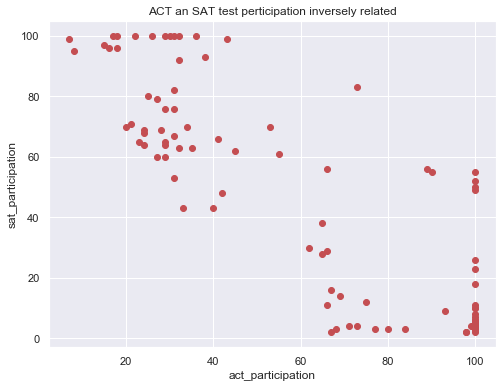

In [80]:
plt.scatter(act_participation,sat_participation, color='r', label='ACT17 Composite')
plt.rcParams["figure.figsize"] = [8,6]
plt.title('ACT an SAT test perticipation inversely related')
plt.xlabel('act_participation')
plt.ylabel('sat_participation')
plt.show()


Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. <br />

The SAT or ACT are test that high school students have to take before college

The choice of taking either test is usually stem from which  states the students are from
<br />

<span style='color:Green'>
- States that require ACT: 18
- States that require SAT: 11 
Data source:
https://www.testive.com/state-sat-act/
</SPAN>

<br />
We see that out of the 51 states in US, mandatory requirements for the ACT and SAT stands at 18 and 11 respectively

On the other hand, students from family with a higher income should generally do better. 
For a start, a higher income family usually means that the parents have a higher level of education. 
The student also do not need to worry about the daily needs in life
(Does he/she needs to take on part time job while studying to provide for family?). 

<br />

<span style='color:Green'>

Students from famalies earning more than 200,000 dollars a year average a combined score of 1714 while 
students from famalies earning under 20,000 dollars a year average a combined score of 1326

Data source:
https://www.washingtonpost.com/news/wonk/wp/2014/03/05/these-four-charts-show-how-the-sat-favors-the-rich-educated-families/

"Lower-income students are more likley to have lower ACT scores than higher-income students"
Data source:
https://www.act.org/content/dam/act/unsecured/documents/5688-data-byte-2016-5-adjusted-differences-in-act-scores-by-family-income.pdf

   
From a case example, we see how Illinois switch from ACT to SAT
"Illinois recently began offering the SAT to all juniors in public high schools. 
As a result, SAT usage in that state spiked from 12,402 in the Class of 2017 to 145,919 in the Class of 2018"
"Students are able to take a practice version, called the PSAT, in 10th grade. Then, they can get help through free online tutoring"
Data source:
https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/

</SPAN>
<br />      
    
    
    
Beyond the perks as mentioned in the case of Illinois, ultimate aim is provding quality education in preparation for college
A family's education or income gap ideally should not be a deterrent factor.
As such, more states should consider making SAT/ACT test a requirement. State-administered SATs are usually free

NB: Words in green, cited from internet

Are there additional data you desire that would better inform your investigations?

<span style='color:Blue'>

**The other way of looking at the merging of data:**
<br />
1. I did the merging of 4 datasets in the top-down way as an alternative way to look and analyse the data
Alternatively, there is a more elegant way:
    - add a 'year' field to all 4 datasets (act17/18, sat17/18).
(act17's year has '2017' etc)
    - Merge act17 to act18 to give act_2017_2018
    - Merge sat17 to sat18 to give sat_2017_2018
    - This way have more data for act and sat just by adding a 'year' field without the need to dropping any columns

    
</span>